In [1]:
import pandas as pd

In [2]:
ts = pd.read_csv('dados/ts.csv')

In [3]:
ts.head()

,index,venda_item_dia
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [6]:
ts = ts.rename(columns = {'index':'mes', 'venda_item_dia': 'vendas' })

In [7]:
ts.head()

,mes,vendas
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [9]:
ts.shape

(34, 2)

In [10]:
ts.dtypes

mes        object
vendas    float64
dtype: object

In [11]:
ts['mes'] = pd.to_datetime(ts['mes'])
ts.dtypes

mes       datetime64[ns]
vendas           float64
dtype: object

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


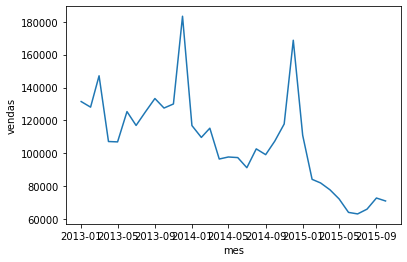

In [14]:
sns.lineplot(x='mes', y='vendas', data=ts)

Text(0.0, 1.0, 'Vendas janeiro de 2013 a outubro de 2015')

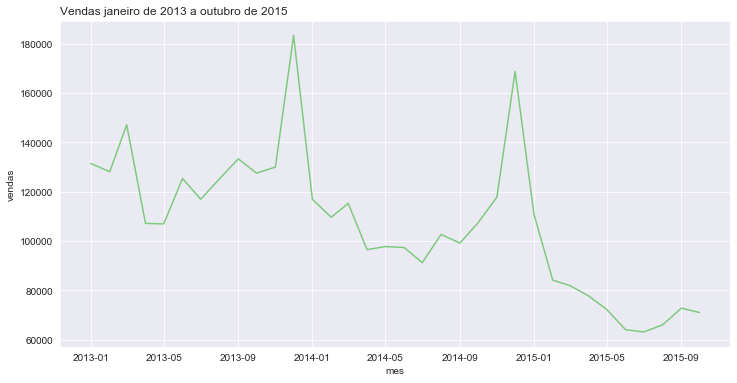

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas', data=ts)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas janeiro de 2013 a outubro de 2015', loc='left')

In [20]:
ts['aumento'] = ts['vendas'].diff()

In [21]:
ts.head()

,mes,vendas,aumento
0,2013-01-01,131479.0,NaN
1,2013-02-01,128090.0,-3389.0
2,2013-03-01,147142.0,19052.0
3,2013-04-01,107190.0,-39952.0
4,2013-05-01,106970.0,-220.0


Text(0.0, 1.0, 'diferença das Vendas janeiro de 2013 a outubro de 2015')

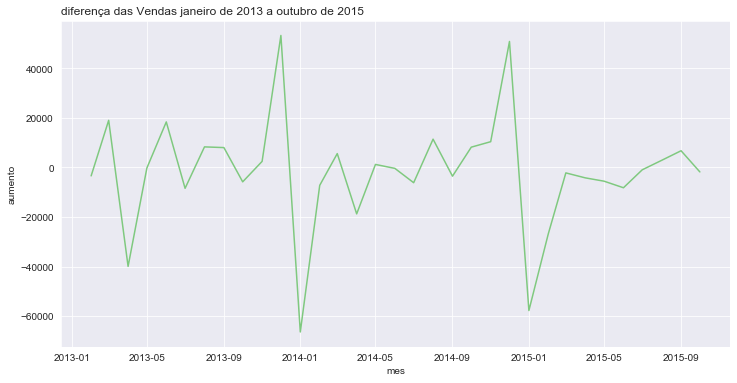

In [23]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento', data=ts)
ax.figure.set_size_inches(12,6)
ax.set_title('diferença das Vendas janeiro de 2013 a outubro de 2015', loc='left')

In [24]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x ,y=y , data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax.set_title(titulo, loc='left')

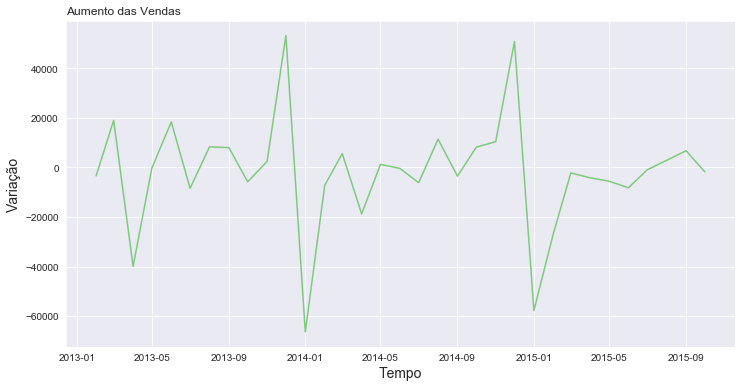

In [26]:
plotar('Aumento das Vendas', 'Tempo', 'Variação','mes', 'aumento', ts)

In [27]:
ts['aceleracao'] = ts['aumento'].diff()

In [28]:
ts.head()

,mes,vendas,aumento,aceleracao
0,2013-01-01,131479.0,NaN,NaN
1,2013-02-01,128090.0,-3389.0,NaN
2,2013-03-01,147142.0,19052.0,22441.0
3,2013-04-01,107190.0,-39952.0,-59004.0
4,2013-05-01,106970.0,-220.0,39732.0


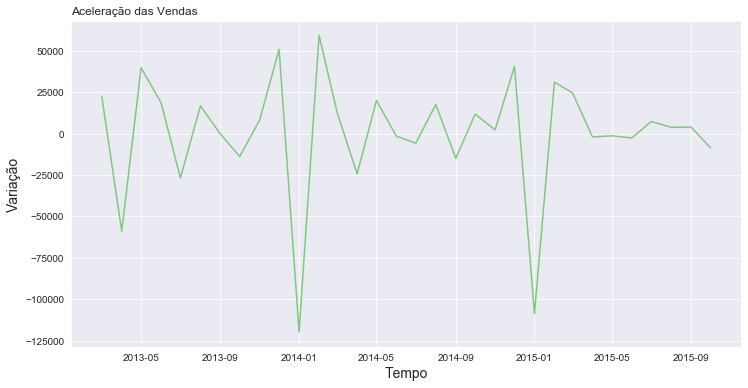

In [29]:
plotar('Aceleração das Vendas', 'Tempo', 'Variação','mes', 'aceleracao', ts)